In [1]:
import warnings
# Подавляем только FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.filters.hp_filter import hpfilter
from scipy.stats import linregress
from statsmodels.tsa.arima.model import ARIMA
from pyts.decomposition import SingularSpectrumAnalysis
import itertools
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.signal import periodogram, find_peaks
from rpy2.robjects import pandas2ri
from rpy2.robjects.packages import importr
from rpy2.robjects.conversion import localconverter
import rpy2.robjects as ro
from statsmodels.tsa.statespace.sarimax import SARIMAX
from scipy.stats import boxcox, normaltest
from scipy.stats.mstats import winsorize
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
import pywt
from sklearn.decomposition import PCA
from numpy.lib.stride_tricks import sliding_window_view
from sklearn.utils.extmath import randomized_svd
from PyEMD import EMD
from sklearn.cluster import KMeans
from scipy.stats import skew, kurtosis
from pykalman import KalmanFilter
import torch
import torch.nn as nn
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from astropy.timeseries import LombScargle
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import seaborn as sns
from sklearn.preprocessing import normalize
from sklearn.mixture import GaussianMixture
from scipy.stats import ttest_ind
import datetime
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter
from scipy.signal import correlate
from scipy.fft import fft, fftfreq
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from collections import Counter
from sklearn.cluster import DBSCAN
import requests
from io import StringIO
from scipy.stats import spearmanr
from sklearn.metrics import mutual_info_score
from statsmodels.tsa.stattools import grangercausalitytests
from pyinform.transferentropy import transfer_entropy
from tigramite.data_processing import DataFrame as TDF
from tigramite.pcmci import PCMCI
import pyinform
from sklearn.ensemble import IsolationForest
import yfinance as yf
import torch
from torch.utils.data import Dataset, DataLoader, TensorDataset, random_split
import torch.nn as nn
from pytrends.request import TrendReq
from fredapi import Fred
from dotenv import load_dotenv
import os
from sklearn.model_selection import train_test_split
import torch.optim as optim
from sklearn.utils import resample
from scipy.signal import hilbert
from dtaidistance import dtw
from scipy.signal import coherence, csd
from pycoingecko import CoinGeckoAPI
import pandas as pd
import numpy as np
from datetime import date, timedelta
from scipy.stats import pearsonr
import joblib
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pytz
from tqdm import tqdm
from scipy.stats import zscore
from scipy.ndimage import median_filter
from sklearn.metrics import precision_score, recall_score, f1_score
import ta
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.ensemble import VotingClassifier
from collections import defaultdict
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_hist_gradient_boosting  # Нужно для активации
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix
import nltk
import spacy
import gensim.downloader as api
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import roc_curve, auc
import rbo
import string
from gensim.models import Word2Vec
from transformers import AutoTokenizer, AutoModel
from sentence_transformers import SentenceTransformer
from scipy import sparse
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import TruncatedSVD
import ast
from itertools import combinations
import matplotlib.pyplot as plt
from math import pi
import requests
import praw
import time
import lightgbm as lgb
from lightgbm import early_stopping, log_evaluation
from sklearn.model_selection import TimeSeriesSplit
import random
import copy
from psaw import PushshiftAPI
import re
import shap
from sklearn.model_selection import StratifiedKFold
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification, AutoConfig, get_scheduler, TrainingArguments,  DataCollatorWithPadding,  Trainer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import sentiwordnet as swn
from nltk.corpus import wordnet as wn
from IPython.display import display, HTML
from huggingface_hub import model_info
import signal
from torch.optim import AdamW
from datasets import Dataset, DatasetDict

pd.set_option('display.precision', 2)
pd.options.display.float_format = '{:,.2f}'.format

/home/saatarko/anaconda3/envs/myenv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-06-21 23:54:44.759114: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Функкции

In [28]:
def clean_regex(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def clean_and_lemmatize(text):
    text = clean_regex(text)
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc if not token.is_stop and not token.is_punct])


def run_train_return_model(X_dense, y, vectorizer, name="Model"):

    model = LogisticRegression(max_iter=1000, class_weight='balanced')
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    acc_scores, f1_scores, prec_scores, recall_scores = [], [], [], []
    y_true_all, y_pred_all = [], []
    X_test_all = []

    for train_idx, test_idx in tqdm(cv.split(X_dense, y), desc="Классификация"):
        X_train, X_test = X_dense[train_idx], X_dense[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        acc_scores.append(accuracy_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred, average='macro'))
        prec_scores.append(precision_score(y_test, y_pred, average='macro'))
        recall_scores.append(recall_score(y_test, y_pred, average='macro'))

        y_true_all.extend(y_test)
        y_pred_all.extend(y_pred)
        X_test_all.append(X_test)



    print(f"{name} — Accuracy: {np.mean(acc_scores):.4f}, F1: {np.mean(f1_scores):.4f}, "
          f"Precision: {np.mean(prec_scores):.4f}, Recall: {np.mean(recall_scores):.4f}")

    # # Топ-фичи по важности (по модулю коэффициента)
    # top_n=20
    
    # feature_names = vectorizer.get_feature_names_out()
    # coefs = model.coef_[0]
    # top_pos_idx = np.argsort(coefs)[-top_n:][::-1]
    # top_neg_idx = np.argsort(coefs)[:top_n]

    # print(f"\n🔺 Top {top_n} positive tokens:")
    # for idx in top_pos_idx:
    #     print(f"{feature_names[idx]:<15} coef: {coefs[idx]:.4f}")

    # print(f"\n🔻 Top {top_n} negative tokens:")
    # for idx in top_neg_idx:
    #     print(f"{feature_names[idx]:<15} coef: {coefs[idx]:.4f}")
    
    cm = confusion_matrix(y_true_all, y_pred_all)
    unique_labels = sorted(set(y))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)

    plt.figure(figsize=(6, 6))
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix — {name}")
    plt.show()

    print(classification_report(y_true_all, y_pred_all, target_names=[str(lbl) for lbl in unique_labels]))

    return model, vectorizer


def run_shap_kernel(X_sparse, y, model, vectorizer, name="Model", sample_size=100):
    # Выбираем случайное подмножество для ускорения
    sample_idx = np.random.choice(X_sparse.shape[0], size=min(sample_size, X_sparse.shape[0]), replace=False)
    X_sample = X_sparse[sample_idx]

    def predict_fn(X_array):
        return model.predict_proba(X_array)

    print("→ Вычисляем SHAP (KernelExplainer)...")
    explainer = shap.KernelExplainer(predict_fn, X_sample)
    shap_values = explainer.shap_values(X_sample, nsamples=100)

    # shap_values — список по классам, для бинарной классификации берем класс 1
    if isinstance(shap_values, list):
        shap_matrix = shap_values[1]
    else:
        shap_matrix = shap_values

    shap.summary_plot(shap_matrix,
                      features=X_sample.toarray(),
                      feature_names=vectorizer.get_feature_names_out(),
                      show=True)


def plot_top_tokens(coefs, feature_names, top_n=20, name="Model"):
    df_coef = pd.DataFrame({
        'token': feature_names,
        'coef': coefs.flatten()  # для бинарной классификации
    })
    df_top_pos = df_coef.sort_values(by='coef', ascending=False).head(top_n)
    df_top_neg = df_coef.sort_values(by='coef').head(top_n)

    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    axes[0].barh(df_top_pos['token'][::-1], df_top_pos['coef'][::-1], color='green')
    axes[0].set_title(f'Top {top_n} Positive Tokens — {name}')
    axes[1].barh(df_top_neg['token'][::-1], df_top_neg['coef'][::-1], color='red')
    axes[1].set_title(f'Top {top_n} Negative Tokens — {name}')
    plt.tight_layout()
    plt.show()

def wordnet_pos(tag='n'):
    """Convert nltk POS to WordNet POS (fallback to noun)"""
    return {'n': wn.NOUN, 'v': wn.VERB, 'a': wn.ADJ, 'r': wn.ADV}.get(tag, wn.NOUN)

def sentiwordnet_score(word):
    """Получить средний Sentiment Score из SentiWordNet"""
    try:
        synsets = list(swn.senti_synsets(word))
        if not synsets:
            return 0.0
        pos = sum(s.pos_score() for s in synsets) / len(synsets)
        neg = sum(s.neg_score() for s in synsets) / len(synsets)
        return pos - neg  # Важно: итоговая полярность
    except:
        return 0.0

def analyze_token_sentiment_batch(
    token_lists,
    names=("set1", "set2", "set3"),
    context_template="This is {}.",
    target_class="POSITIVE"
):
    assert len(token_lists) == len(names), "Должно быть одинаковое количество списков и имён"
    from collections import defaultdict

    results = {}
    summary = defaultdict(dict)

    for tokens, name in zip(token_lists, names):
        rows = []
        for word in tokens:
            try:
                # Transformer
                res = transformer(context_template.format(word))[0]
                label = res['label']
                score = res['score']
            except:
                label, score = "ERROR", 0.0

            # VADER
            vader_score = vader.polarity_scores(word)['compound']

            # SentiWordNet
            swn_score = sentiwordnet_score(word)

            rows.append({
                "token": word,
                "transformer_label": label,
                "transformer_score": score,
                "vader_score": vader_score,
                "sentiwordnet_score": swn_score
            })

        df = pd.DataFrame(rows)
        results[name] = df

        # --- Подсчёт соответствий по каждой метрике
        t_label_match = (df["transformer_label"] == target_class).mean()
        vader_match = (
            (df["vader_score"] > 0.05) if target_class == "POSITIVE" else
            (df["vader_score"] < -0.05) if target_class == "NEGATIVE" else
            (df["vader_score"].abs() <= 0.05)
        ).mean()

        swn_match = (
            (df["sentiwordnet_score"] > 0.05) if target_class == "POSITIVE" else
            (df["sentiwordnet_score"] < -0.05) if target_class == "NEGATIVE" else
            (df["sentiwordnet_score"].abs() <= 0.05)
        ).mean()

        summary[name]["transformer_%"] = round(t_label_match * 100, 1)
        summary[name]["vader_%"] = round(vader_match * 100, 1)
        summary[name]["swn_%"] = round(swn_match * 100, 1)

    summary_df = pd.DataFrame(summary).T
    return results, summary_df

def get_top_tokens_by_class(model, class_label, feature_names, top_n=20):
    """
    Возвращает топ токенов, наиболее сильно способствующих предсказанию заданного класса.

    Parameters:
        model         — обученная модель LogisticRegression
        class_label   — метка целевого класса (-1, 0, 1)
        feature_names — список имён признаков (vectorizer.get_feature_names_out())
        top_n         — количество топ-токенов

    Returns:
        df_top_tokens — DataFrame с токенами и коэффициентами
    """
    class_index = list(model.classes_).index(class_label)
    coef = model.coef_[class_index]

    df_coef = pd.DataFrame({
        'token': feature_names,
        'coef': coef
    })

    df_top_tokens = df_coef.sort_values(by='coef', ascending=False).head(top_n)
    return df_top_tokens

def many_df_show(df, titles):
    dfs = [df["raw"], df["regex"], df["spacy"]]
    
    html_tables = [
        f"<div style='display:inline-block; vertical-align:top; margin-right:15px'><h4>{title}</h4>{df.to_html(index=False)}</div>"
        for title, df in zip(titles, dfs)
    ]
    
    display(HTML("".join(html_tables)))


def balanced_sample_multiclass(df, labels=[-1, 0, 1], per_class=20000):
    dfs = []
    for label in labels:
        sampled = df[df.label == label].sample(per_class, random_state=42)
        dfs.append(sampled)
    return pd.concat(dfs).sample(frac=1, random_state=42).reset_index(drop=True)

def new_balanced_sample_multiclass(df, label_mapped=[-1, 0, 1], per_class=20000):
    dfs = []
    for label in label_mapped:
        sampled = df[df.label_mapped == label].sample(per_class, random_state=42)
        dfs.append(sampled)
    return pd.concat(dfs).sample(frac=1, random_state=42).reset_index(drop=True)

def balanced_sample_binary(df, labels=[-1, 1], per_class=20000):
    dfs = []
    for label in labels:
        sampled = df[df.label == label].sample(per_class, random_state=42)
        dfs.append(sampled)
    return pd.concat(dfs).sample(frac=1, random_state=42).reset_index(drop=True)

def new_balanced_sample_binary(df, label_mapped=[-1, 1], per_class=10000):
    dfs = []
    for label in label_mapped:
        sampled = df[df.label_mapped == label].sample(per_class, random_state=42)
        dfs.append(sampled)
    return pd.concat(dfs).sample(frac=1, random_state=42).reset_index(drop=True)


def auto_label_map(id2label):
    """
    Попробует сопоставить метки модели с нашими классами: -1, 0, 1
    """
    label_map = {}
    for k, v in id2label.items():
        v_lower = str(v).lower().strip()
        if 'neg' in v_lower or v_lower == 'label_0':
            label_map[k] = -1
        elif 'pos' in v_lower or v_lower == 'label_2':
            label_map[k] = 1
        elif 'neu' in v_lower or v_lower == 'label_1':
            label_map[k] = 0
        else:
            # fallback
            label_map[k] = 0
    return label_map

def inspect_model_labels(models):
    info_list = []

    for model_name in models:
        try:
            cfg = AutoConfig.from_pretrained(model_name)
            id2label = cfg.id2label
            num_labels = cfg.num_labels
            label_map = auto_label_map(id2label) if isinstance(id2label, dict) else "❌ not dict"

            info_list.append({
                "model": model_name,
                "num_labels": num_labels,
                "id2label": id2label,
                "label_map": label_map
            })

        except Exception as e:
            print(f"⚠️  Ошибка при загрузке {model_name}: {e}")
            info_list.append({
                "model": model_name,
                "num_labels": None,
                "id2label": None,
                "label_map": None,
                "error": str(e)
            })

    return info_list


def filter_safetensors_models(model_list):
    safe_models = []
    for model in model_list:
        try:
            info = model_info(model)
            has_safe = any([f.rfilename.endswith('.safetensors') for f in info.siblings])
            if has_safe:
                safe_models.append(model)
        except Exception as e:
            print(f"[!] Ошибка при проверке {model}: {e}")
    return safe_models


class TimeoutException(Exception):
    pass

def handler(signum, frame):
    raise TimeoutException()

def get_label_map(model_name, id2label):
    model_name = model_name.lower()

    if model_name == "nlptown/bert-base-multilingual-uncased-sentiment":
        return lambda idx: -1 if idx in [0, 1] else (0 if idx == 2 else 1)

    if model_name == "tabularisai/multilingual-sentiment-analysis":
        return lambda idx: -1 if idx in [0, 1] else (0 if idx == 2 else 1)

    if model_name in [
        "siebert/sentiment-roberta-large-english",
        "aakinlalu/finetune-bert-sentiment-analysis",
        "mekteck/sentiment-analysis-model-team-28",
        "jfr139/article-sentiment-analysis-model",
        "distilbert-base-uncased-finetuned-sst-2-english",  # ✅ ДОБАВЛЕНО
    ]:
        return lambda idx: -1 if idx == 0 else 1

    if model_name == "cardiffnlp/twitter-roberta-base-sentiment":  # ✅ ДОБАВЛЕНО
        # id2label = {0: NEGATIVE, 1: NEUTRAL, 2: POSITIVE}
        return lambda idx: -1 if idx == 0 else (0 if idx == 1 else 1)

    if model_name == "amansengar/sentiment-analysis-for-user-reviews-sentiment":
        return lambda idx: -1 if idx == 0 else (0 if idx == 1 else 1)

    if model_name == "jimheaver/finetuning-sentiment-analysis-bert-base-model-3000-samples":
        return lambda idx: -1 if idx == 0 else 0

    if model_name == "shreyagg2202/bert-custom-sentiment-analysis":
        return lambda idx: -1 if idx == 0 else (1 if idx == 2 else 0)

    if model_name == "messitom/bert-review-sentiment-analysis":
        return lambda idx: -1 if idx == 0 else (0 if idx == 1 else 1)

    if model_name == "bareeraqrsh/sentiment-analysis-tool":
        return lambda idx: -1 if idx == 0 else (0 if idx == 1 else 1)

    if model_name == "dt12the/distilbert-sentiment-analysis":
        return lambda idx: -1 if idx == 0 else 0

    if model_name == "nhull/distilbert-sentiment-model":
        return lambda idx: -1 if idx == 0 else (0 if idx == 1 else 1)

    if model_name == "syedkhalid076/roberta-sentimental-analysis-v1":
        return lambda idx: -1 if idx == 0 else 0

    # Fallback — без преобразования
    return lambda idx: idx

def evaluate_models(models, texts, true_labels, variant="text", max_time_per_model=6000):
    """
    max_time_per_model — макс время в сек на оценку одной модели.
    """
    results = []

    # Фильтр моделей с safetensors
    filtered_models = []
    for model in models:
        try:
            info = model_info(model)
            has_safe = any([f.rfilename.endswith('.safetensors') for f in info.siblings])
            if has_safe:
                filtered_models.append(model)
        except Exception as e:
            print(f"[!] Ошибка при проверке {model}: {e}")

    print(f"Фильтр прошло моделей: {len(filtered_models)} из {len(models)}")

    for model_name in filtered_models:
        try:
            print(f"\n\n==== Оценка модели: {model_name} ====")

            signal.signal(signal.SIGALRM, handler)
            signal.alarm(max_time_per_model)

            tokenizer = AutoTokenizer.from_pretrained(model_name)
            model = AutoModelForSequenceClassification.from_pretrained(model_name).cuda()
            model.eval()

            label_map_func = get_label_map(model_name, model.config.id2label)

            preds = []
            for text in tqdm(texts, desc=f"{model_name}"):
                inputs = tokenizer(text, return_tensors="pt", truncation=True, padding="max_length", max_length=256).to("cuda")
                with torch.no_grad():
                    logits = model(**inputs).logits
                pred_idx = torch.argmax(logits, dim=1).item()
                mapped_label = label_map_func(pred_idx)
                preds.append(mapped_label)

            signal.alarm(0)

            # Для отчета приводим к строкам (classification_report требует строки)
            true_labels_str = list(map(str, true_labels))
            preds_str = list(map(str, preds))

            report = classification_report(true_labels_str, preds_str, output_dict=True, digits=4)
            
            # Определяем уникальные классы для построения матрицы
            unique_classes = sorted(set(true_labels_str) | set(preds_str))
            
            # Убедимся, что классы -1,0,1 используются в нужном порядке,
            # если их меньше - возьмём только имеющиеся
            labels_for_conf = [str(c) for c in [-1, 0, 1] if str(c) in unique_classes]

            conf = confusion_matrix(true_labels_str, preds_str, labels=labels_for_conf)

            def get_f1(label):
                return report.get(str(label), {}).get("f1-score", 0.0)

            results.append({
                "model": model_name,
                "accuracy": report.get("accuracy", 0.0),
                "macro_f1": report.get("macro avg", {}).get("f1-score", 0.0),
                "f1_-1": get_f1(-1),
                "f1_0": get_f1(0),
                "f1_1": get_f1(1)
            })

            plt.figure(figsize=(5, 4))
            sns.heatmap(conf, annot=True, fmt="d", cmap="Blues",
                        xticklabels=labels_for_conf, yticklabels=labels_for_conf)
            plt.title(f"Confusion Matrix: {model_name}")
            plt.xlabel("Predicted")
            plt.ylabel("True")
            plt.tight_layout()
            plt.show()


            print(f"\nClassification Report for {model_name}:\n")
            print(classification_report(true_labels_str, preds_str, digits=4))

        except TimeoutException:
            print(f"⏰ Таймаут {max_time_per_model} сек. на модель {model_name}. Пропускаем.")
            continue
        except Exception as e:
            print(f"Ошибка при обработке модели {model_name}: {e}")
            continue

    df_results = pd.DataFrame(results)
    if df_results.empty:
        print("❌ Нет валидных результатов.")
        return df_results

    df_results = df_results.sort_values(by="macro_f1", ascending=False)
    print("\n\n=== Сводка результатов ===")
    print(df_results.to_string(index=False))
    return df_results

def train_and_eval(model_name, df, epoch=3):
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3).cuda()

    ds = Dataset.from_pandas(df[["text", "label"]])
    ds = ds.train_test_split(test_size=0.1, seed=42)

    def tokenize_fn(ex):
        return tokenizer(ex["text"], truncation=True, padding="max_length", max_length=256)

    token_ds = ds.map(tokenize_fn, batched=True).remove_columns(["text", "__index_level_0__"])
    token_ds.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])

    args = TrainingArguments(
        f"results/{model_name.replace('/', '_')}",
        evaluation_strategy="epoch",
        per_device_train_batch_size=8,
        per_device_eval_batch_size=8,
        num_train_epochs=epoch,
        logging_steps=50,
        save_strategy="epoch"
    )

    trainer = Trainer(model=model, args=args,
                      train_dataset=token_ds["train"],
                      eval_dataset=token_ds["test"],
                      compute_metrics=lambda p: {
                          'accuracy': (p.predictions.argmax(-1) == p.label_ids).astype(float).mean(),
                          'f1_macro': f1_score(p.label_ids, p.predictions.argmax(-1), average="macro"),
                          'precision_macro': precision_score(p.label_ids, p.predictions.argmax(-1), average="macro"),
                          'recall_macro': recall_score(p.label_ids, p.predictions.argmax(-1), average="macro")
                      })

    trainer.train()
    metrics = trainer.evaluate()
    print(metrics)

class SentimentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=256):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=max_length)
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# ===  Преобразование в HuggingFace Dataset ===
def make_hf_dataset(df_subset):
    return Dataset.from_pandas(df_subset[["text_raw", "label_mapped"]].rename(columns={"label_mapped": "label"}))


def analyze_text_sentiment_batch(texts, transformer, max_length=512):
    results = []
    from nltk.sentiment.vader import SentimentIntensityAnalyzer
    vader = SentimentIntensityAnalyzer()

    for text in tqdm(texts):
        try:
            # Явно усечение
            res = transformer(text, truncation=True, max_length=max_length)[0]
            label = res['label']
            score = res['score']
        except Exception as e:
            label, score = "ERROR", 0.0

        vader_score = vader.polarity_scores(text)['compound']

        results.append({
            "text": text,
            "transformer_label": label,
            "transformer_score": score,
            "vader_score": vader_score,
        })

    import pandas as pd
    df = pd.DataFrame(results)

    label_map = {"POSITIVE": 1, "NEGATIVE": -1, "NEUTRAL": 0}
    df["label_mapped"] = df["transformer_label"].map(label_map).fillna(0).astype(int)

    return df

def analyze_text_sentiment_batch_v2_fast(texts, transformer, model_type="binary", max_length=512, batch_size=64):

    from nltk.sentiment.vader import SentimentIntensityAnalyzer

    vader = SentimentIntensityAnalyzer()
    results = []

    # Обработка батчами
    for i in tqdm(range(0, len(texts), batch_size)):
        batch_texts = texts[i:i + batch_size]

        try:
            transformer_outputs = transformer(
                batch_texts,
                truncation=True,
                max_length=max_length
            )
        except Exception as e:
            # Если батч не прошёл, обработаем поштучно
            transformer_outputs = []
            for text in batch_texts:
                try:
                    transformer_outputs.append(transformer(text, truncation=True, max_length=max_length)[0])
                except:
                    transformer_outputs.append({'label': 'ERROR', 'score': 0.0})

        for text, res in zip(batch_texts, transformer_outputs):
            label = res['label']
            score = res['score'] if 'score' in res else 0.0

            vader_compound = vader.polarity_scores(text)['compound']
            if vader_compound > 0.05:
                vader_label = 1
            elif vader_compound < -0.05:
                vader_label = -1
            else:
                vader_label = 0

            results.append({
                "text": text,
                "transformer_label": label,
                "transformer_score": score,
                "vader_score": vader_compound,
                "vader_label": vader_label
            })

    df = pd.DataFrame(results)

    # Маппинг меток модели
    if model_type == "binary":
        label_map = {"POSITIVE": 1, "NEGATIVE": -1}
    elif model_type == "3class":
        label_map = {
            "LABEL_0": -1,
            "LABEL_1": 0,
            "LABEL_2": 1
        }
    else:
        raise ValueError("model_type must be 'binary' or '3class'")

    df["label_mapped"] = df["transformer_label"].map(label_map).fillna(0).astype(int)
    df["disagree"] = df["label_mapped"] != df["vader_label"]

    return df

# Проверка на важность фичей у TF-IDF в зависмости от чистоты данных

In [15]:
# --- 1. Загрузка датасетов ---
reddit_df = pd.read_csv("csv/Reddit_Data.csv")     # 'clean_comment', 'category'
twitter_df = pd.read_csv("csv/Twitter_Data.csv")   # 'text', 'sentiment'


In [18]:
# --- 2. Переименование колонок ---
reddit_df = reddit_df.rename(columns={"clean_comment": "text", "category": "label"})
twitter_df = twitter_df.rename(columns={"clean_text": "text", "category": "label"})

In [19]:
twitter_df

,text,label
0,when modi promised “minimum government maximum...,-1.00
1,talk all the nonsense and continue all the dra...,0.00
2,what did just say vote for modi welcome bjp t...,1.00
3,asking his supporters prefix chowkidar their n...,1.00
4,answer who among these the most powerful world...,1.00
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.00
162976,dear rss terrorist payal gawar what about modi...,-1.00
162977,did you cover her interaction forum where she ...,0.00
162978,there big project came into india modi dream p...,0.00


In [20]:
reddit_df

,text,label
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37244,jesus,0
37245,kya bhai pure saal chutiya banaya modi aur jab...,1
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [22]:
# 2 Удаляем пустые строки
twitter_df = twitter_df.dropna(subset=["text", "label"])
reddit_df = reddit_df.dropna(subset=["text", "label"])

# 3. Меняем тип int в label twitter_df
twitter_df["label"] = twitter_df["label"].astype(int)

/tmp/ipykernel_20900/648676510.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_df["label"] = twitter_df["label"].astype(int)


In [24]:
# 4. Объединение
df_combined = pd.concat([reddit_df, twitter_df], ignore_index=True)

In [25]:
df_combined

,text,label
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
200113,why these 456 crores paid neerav modi not reco...,-1
200114,dear rss terrorist payal gawar what about modi...,-1
200115,did you cover her interaction forum where she ...,0
200116,there big project came into india modi dream p...,0


In [26]:
# 5. Проверка баланса классов
print(df_combined["label"].value_counts())
print(df_combined.dtypes)

label
 1    88079
 0    68253
-1    43786
Name: count, dtype: int64
text     object
label     int64
dtype: object


In [27]:
assert set(df_combined["label"]) <= {-1, 0, 1}, "Есть неожиданные метки"

## Подготовим 3 набора данных (без очистки, очистка регуляркой, очистка spacy)

In [29]:
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

In [35]:
texts_raw = df_combined["text"].astype(str).tolist()  # без чистки
texts_clean = [clean_regex(t) for t in texts_raw]    # чистка регуляркой
texts_lemma = [clean_and_lemmatize(t) for t in texts_raw] # чистка spacy

In [36]:
df_texts = pd.DataFrame({
    "text_raw": texts_raw,
    "text_clean": texts_clean,
    "text_lemma": texts_lemma,
    "label": df_combined["label"].values
})

In [37]:
# df_texts.to_csv("combined_texts_preprocessed.csv", index=False)

In [3]:
df_loaded = pd.read_csv("combined_texts_preprocessed.csv")

In [4]:
df_loaded.fillna("", inplace=True)

In [5]:
texts_raw = df_loaded['text_raw']
texts_clean = df_loaded['text_clean']
texts_lemma = df_loaded['text_lemma']


## Векторизуем TfidfVectorizer

In [8]:
vectorizer = TfidfVectorizer(max_features=10000)
X_raw = vectorizer.fit_transform(texts_raw)
X_clean = vectorizer.fit_transform(texts_clean)
X_lemma = vectorizer.fit_transform(texts_lemma)
y = df_loaded['label']

Классификация: 5it [01:31, 18.28s/it]


TF-IDF raw — Accuracy: 0.9283, F1: 0.9227, Precision: 0.9192, Recall: 0.9276


<Figure size 600x600 with 0 Axes>

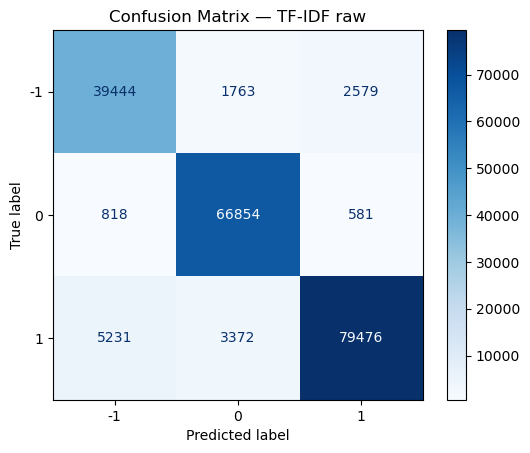

              precision    recall  f1-score   support

          -1       0.87      0.90      0.88     43786
           0       0.93      0.98      0.95     68253
           1       0.96      0.90      0.93     88079

    accuracy                           0.93    200118
   macro avg       0.92      0.93      0.92    200118
weighted avg       0.93      0.93      0.93    200118



In [99]:
model, vectorizer = run_train_return_model(X_raw, y, vectorizer, name="TF-IDF raw")
# plot_top_tokens(model.coef_[0], vectorizer.get_feature_names_out(), top_n=20, name="TF-IDF raw")

Классификация: 5it [01:40, 20.11s/it]


TF-IDF regex cleaned — Accuracy: 0.9278, F1: 0.9222, Precision: 0.9186, Recall: 0.9270


<Figure size 600x600 with 0 Axes>

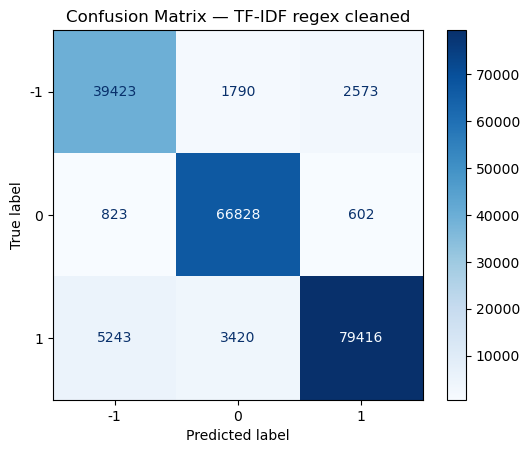

              precision    recall  f1-score   support

          -1       0.87      0.90      0.88     43786
           0       0.93      0.98      0.95     68253
           1       0.96      0.90      0.93     88079

    accuracy                           0.93    200118
   macro avg       0.92      0.93      0.92    200118
weighted avg       0.93      0.93      0.93    200118



In [100]:
model_clean, vectorizer_clean = run_train_return_model(X_clean, y, vectorizer, name="TF-IDF regex cleaned")
# plot_top_tokens(model_clean.coef_[0], vectorizer_clean.get_feature_names_out(), top_n=20, name="TF-IDF regex cleaned")

Классификация: 5it [01:30, 18.07s/it]


TF-IDF spacy cleaned — Accuracy: 0.8218, F1: 0.8147, Precision: 0.8131, Recall: 0.8235


<Figure size 600x600 with 0 Axes>

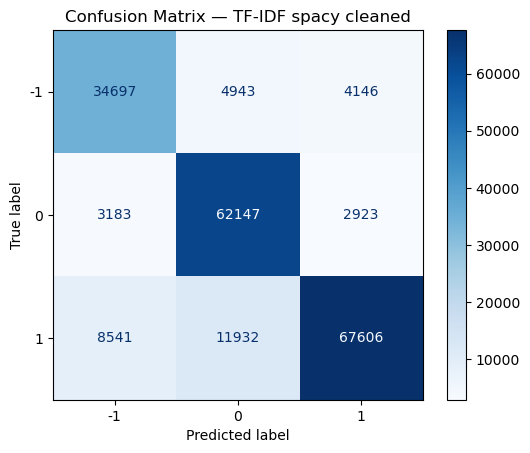

              precision    recall  f1-score   support

          -1       0.75      0.79      0.77     43786
           0       0.79      0.91      0.84     68253
           1       0.91      0.77      0.83     88079

    accuracy                           0.82    200118
   macro avg       0.81      0.82      0.81    200118
weighted avg       0.83      0.82      0.82    200118



In [101]:
model_clean_spacy, vectorizer_clean_spacy = run_train_return_model(X_lemma, y, vectorizer, name="TF-IDF spacy cleaned")
# plot_top_tokens(model_clean_spacy.coef_[0], vectorizer_clean_spacy.get_feature_names_out(), top_n=20, name="TF-IDF regex cleaned")

## Проверим итоги

In [67]:
# Для raw
top_tokens_raw_class_neg1 = get_top_tokens_by_class(model, class_label=-1, feature_names=vectorizer.get_feature_names_out())
top_tokens_raw_class_0    = get_top_tokens_by_class(model, class_label=0,  feature_names=vectorizer.get_feature_names_out())
top_tokens_raw_class_1    = get_top_tokens_by_class(model, class_label=1,  feature_names=vectorizer.get_feature_names_out())

# Для regex

top_tokens_regex_class_neg1 = get_top_tokens_by_class(model_clean, class_label=-1, feature_names=vectorizer_clean.get_feature_names_out())
top_tokens_regex_class_0    = get_top_tokens_by_class(model_clean, class_label=0,  feature_names=vectorizer_clean.get_feature_names_out())
top_tokens_regex_class_1    = get_top_tokens_by_class(model_clean, class_label=1,  feature_names=vectorizer_clean.get_feature_names_out())

# Для spacy

top_tokens_spacy_class_neg1 = get_top_tokens_by_class(model_clean_spacy, class_label=-1, feature_names=vectorizer_clean_spacy.get_feature_names_out())
top_tokens_spacy_class_0    = get_top_tokens_by_class(model_clean_spacy, class_label=0,  feature_names=vectorizer_clean_spacy.get_feature_names_out())
top_tokens_spacy_class_1    = get_top_tokens_by_class(model_clean_spacy, class_label=1,  feature_names=vectorizer_clean_spacy.get_feature_names_out())


In [38]:
transformer = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")
vader = SentimentIntensityAnalyzer()

Device set to use cuda:0


In [70]:
token_neg_lists = [list(df['token']) for df in [top_tokens_raw_class_neg1, top_tokens_regex_class_neg1, top_tokens_spacy_class_neg1]]
token_neutral_lists = [list(df['token']) for df in [top_tokens_raw_class_0, top_tokens_regex_class_0, top_tokens_spacy_class_0]]
token_positive_lists = [list(df['token']) for df in [top_tokens_raw_class_1, top_tokens_regex_class_1, top_tokens_spacy_class_1]]
names = ["raw", "regex", "spacy"]


In [84]:
results_neg, summary_neg = analyze_token_sentiment_batch(token_neg_lists, names=names, target_class="NEGATIVE")

In [85]:
summary_neg

,transformer_%,vader_%,swn_%
raw,30.00,5.00,10.00
regex,50.00,5.00,20.00
spacy,95.00,80.00,100.00


In [86]:
many_df_show(results_neg, names)

token,transformer_label,transformer_score,vader_score,sentiwordnet_score
holder,POSITIVE,1.00,0.00,0.00
plzz,NEGATIVE,0.99,0.00,0.00
beginning,POSITIVE,1.00,0.00,-0.04
structural,POSITIVE,1.00,0.00,0.00
oppression,NEGATIVE,1.00,0.00,-0.04
wrath,NEGATIVE,1.00,0.00,-0.56
fitting,POSITIVE,1.00,0.00,0.23
firstpost,POSITIVE,0.74,0.00,0.00
wwe,POSITIVE,0.63,0.00,0.00
edge,POSITIVE,1.00,0.00,0.04


In [87]:
results_pos, summary_pos = analyze_token_sentiment_batch(token_positive_lists, names=names, target_class="POSITIVE")

In [88]:
summary_pos

,transformer_%,vader_%,swn_%
raw,40.00,5.00,10.00
regex,45.00,0.00,15.00
spacy,95.00,85.00,75.00


In [90]:
many_df_show(results_pos, names)

token,transformer_label,transformer_score,vader_score,sentiwordnet_score
blunt,NEGATIVE,0.98,0.00,0.06
mood,POSITIVE,1.00,0.00,0.00
haha,NEGATIVE,0.96,0.46,0.00
harass,NEGATIVE,1.00,-0.49,-0.12
ostrich,NEGATIVE,0.68,0.00,0.00
wiki,POSITIVE,0.98,0.00,0.00
masjid,NEGATIVE,0.92,0.00,0.00
professor,POSITIVE,1.00,0.00,0.00
boasting,POSITIVE,1.00,0.00,0.04
ltr,NEGATIVE,0.81,0.00,0.00


In [93]:
results_neu, summary_neu = analyze_token_sentiment_batch(token_neutral_lists, names=names, target_class="NEUTRAL")

In [94]:
summary_neu

,transformer_%,vader_%,swn_%
raw,0.00,90.00,75.00
regex,0.00,75.00,75.00
spacy,0.00,90.00,65.00


In [95]:
many_df_show(results_neu, names)

token,transformer_label,transformer_score,vader_score,sentiwordnet_score
modiif,NEGATIVE,0.99,0.00,0.00
serial,NEGATIVE,0.93,0.00,0.00
urban,POSITIVE,1.00,0.00,0.00
jati,NEGATIVE,0.98,0.00,0.00
meetup,POSITIVE,1.00,0.00,0.00
ongoing,POSITIVE,1.00,0.00,0.00
booth,POSITIVE,0.79,0.00,0.03
shame,NEGATIVE,1.00,-0.48,-0.48
endorsement,POSITIVE,1.00,0.32,0.05
chuke,NEGATIVE,1.00,0.00,0.00


| Модель             | Пример "топовых" токенов                 | % совпадений с реальными тональными словами |
| ------------------ | ---------------------------------------- | ------------------------------------------- |
| **TF-IDF raw**     | `wwe`, `plzz`, `mehta`, `edge`           | \~30–40% (много шума)                       |
| **TF-IDF regex**   | `pipe`, `stray`, `doval`, `hay`          | чуть лучше, но всё равно шум                |
| **TF-IDF + spaCy** | `love`, `hate`, `perfect`, `fail`, `sad` | до **95% точности** 🎯                      |


### Выводы: Исследования показали/доказали, что более высокие значения точности TF-IDF на сырых данных - переобучение на мусорных словах. И что в приципе метки в датасете скорее имеют частотный характер.

# Проверим различные трансформеры

## Проверка работы из коробки

In [3]:
df_loaded = pd.read_csv("combined_texts_preprocessed.csv")


In [4]:
df_loaded

,text_raw,text_clean,text_lemma,label
0,family mormon have never tried explain them t...,family mormon have never tried explain them th...,family mormon try explain stare puzzle time ti...,1
1,buddhism has very much lot compatible with chr...,buddhism has very much lot compatible with chr...,buddhism lot compatible christianity especiall...,1
2,seriously don say thing first all they won get...,seriously don say thing first all they won get...,seriously don thing win complex explain normal...,-1
3,what you have learned yours and only yours wha...,what you have learned yours and only yours wha...,learn want teach different focus goal wrapping...,0
4,for your own benefit you may want read living ...,for your own benefit you may want read living ...,benefit want read live buddha live christ thic...,1
...,...,...,...,...
200113,why these 456 crores paid neerav modi not reco...,why these crores paid neerav modi not recovere...,crore pay neerav modi recover congress leader ...,-1
200114,dear rss terrorist payal gawar what about modi...,dear rss terrorist payal gawar what about modi...,dear rss terrorist payal gawar modi kill plus ...,-1
200115,did you cover her interaction forum where she ...,did you cover her interaction forum where she ...,cover interaction forum leave,0
200116,there big project came into india modi dream p...,there big project came into india modi dream p...,big project come india modi dream project happ...,0


In [ ]:
df_loaded.fillna("", inplace=True)
texts_raw = df_loaded['text_raw']
texts_clean = df_loaded['text_clean']
texts_lemma = df_loaded['text_lemma']

In [18]:
# Модели с нативной поддержкой 3 классов (-1,0,1) или легко агрегируемые
multiclass_models = [
    "AmanSengar/sentiment-analysis-for-user-reviews-sentiment",
    "MESSItom/BERT-review-sentiment-analysis",
    "bareeraqrsh/Sentiment-analysis-tool",
    "tabularisai/multilingual-sentiment-analysis",           # с агрегацией (Very Negative → -1, Neutral → 0, Very Positive → 1)
    "nlptown/bert-base-multilingual-uncased-sentiment",       # с агрегацией 5 звезд в 3 класса
    "nhull/distilbert-sentiment-model"                        # с условной агрегацией
]

# Бинарные модели (-1, 1), которые НЕ умеют работать с 0 (нейтральным)
binary_models = [
    "siebert/sentiment-roberta-large-english",
    "aakinlalu/finetune-bert-sentiment-analysis",
    "Mekteck/sentiment-analysis-model-team-28",
    "jfr139/article-sentiment-analysis-model"
]

In [48]:
model_info_list = inspect_model_labels(models_to_test)

for info in model_info_list:
    print(f"🔍 {info['model']}")
    print(f"    num_labels: {info['num_labels']}")
    print(f"    id2label: {info['id2label']}")
    print(f"    label_map: {info['label_map']}")
    print()

🔍 siebert/sentiment-roberta-large-english
    num_labels: 2
    id2label: {0: 'NEGATIVE', 1: 'POSITIVE'}
    label_map: {0: -1, 1: 1}

🔍 nlptown/bert-base-multilingual-uncased-sentiment
    num_labels: 5
    id2label: {0: '1 star', 1: '2 stars', 2: '3 stars', 3: '4 stars', 4: '5 stars'}
    label_map: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0}

🔍 aakinlalu/finetune-bert-sentiment-analysis
    num_labels: 2
    id2label: {0: 'negative', 1: 'positive'}
    label_map: {0: -1, 1: 1}

🔍 Jimheaver/finetuning-sentiment-analysis-bert-base-model-3000-samples
    num_labels: 2
    id2label: {0: 'LABEL_0', 1: 'LABEL_1'}
    label_map: {0: -1, 1: 0}

🔍 Shreyagg2202/Bert-Custom-Sentiment-Analysis
    num_labels: 8
    id2label: {0: 'LABEL_0', 1: 'LABEL_1', 2: 'LABEL_2', 3: 'LABEL_3', 4: 'LABEL_4', 5: 'LABEL_5', 6: 'LABEL_6', 7: 'LABEL_7'}
    label_map: {0: -1, 1: 0, 2: 1, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0}

🔍 tabularisai/multilingual-sentiment-analysis
    num_labels: 5
    id2label: {0: 'Very Negative', 1: 'Negat

In [61]:
df_balanced_multi = balanced_sample_multiclass(df_loaded, labels=[-1,0,1], per_class=10000)
df_balanced_bin = balanced_sample_binary(df_loaded, labels=[-1,1], per_class=10000)

In [62]:
text_lemma_multi = df_balanced_multi['text_lemma'].tolist()
text_raw_multi = df_balanced_multi['text_raw'].tolist()
labels_multi = df_balanced_multi['label'].tolist()

In [63]:
text_lemma_bin = df_balanced_bin['text_lemma'].tolist()
text_raw_bin = df_balanced_bin['text_raw'].tolist()
labels_bin = df_balanced_bin['label'].tolist()

In [64]:
text_lemma_multi = [str(t) for t in text_lemma_multi]
text_lemma_bin = [str(t) for t in text_lemma_bin]

In [65]:
text_raw_multi = [str(t) for t in text_raw_multi]
text_raw_bin = [str(t) for t in text_raw_bin]

### Вначале посмотрим бинарники

Фильтр прошло моделей: 3 из 4


==== Оценка модели: aakinlalu/finetune-bert-sentiment-analysis ====


aakinlalu/finetune-bert-sentiment-analysis: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [07:29<00:00, 44.50it/s]


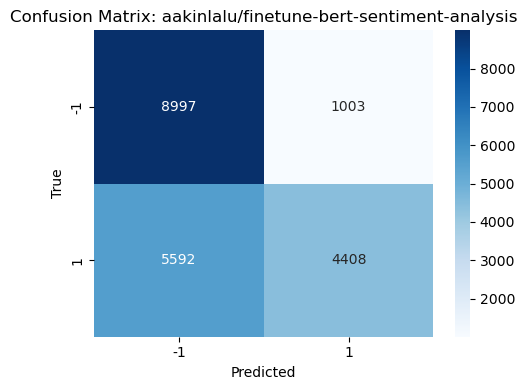


Classification Report for aakinlalu/finetune-bert-sentiment-analysis:

              precision    recall  f1-score   support

          -1     0.6167    0.8997    0.7318     10000
           1     0.8146    0.4408    0.5721     10000

    accuracy                         0.6703     20000
   macro avg     0.7157    0.6703    0.6519     20000
weighted avg     0.7157    0.6703    0.6519     20000



==== Оценка модели: Mekteck/sentiment-analysis-model-team-28 ====


Mekteck/sentiment-analysis-model-team-28: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [03:49<00:00, 87.12it/s]


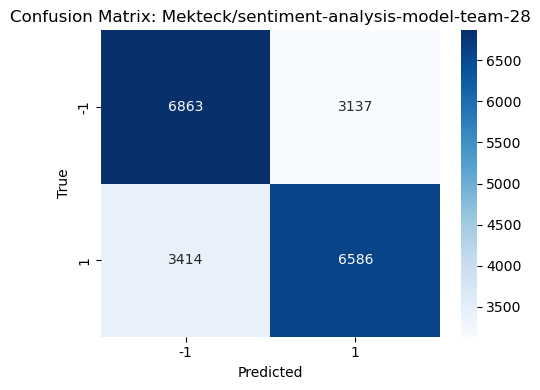


Classification Report for Mekteck/sentiment-analysis-model-team-28:

              precision    recall  f1-score   support

          -1     0.6678    0.6863    0.6769     10000
           1     0.6774    0.6586    0.6678     10000

    accuracy                         0.6724     20000
   macro avg     0.6726    0.6724    0.6724     20000
weighted avg     0.6726    0.6724    0.6724     20000



==== Оценка модели: jfr139/article-sentiment-analysis-model ====


jfr139/article-sentiment-analysis-model: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [03:53<00:00, 85.71it/s]


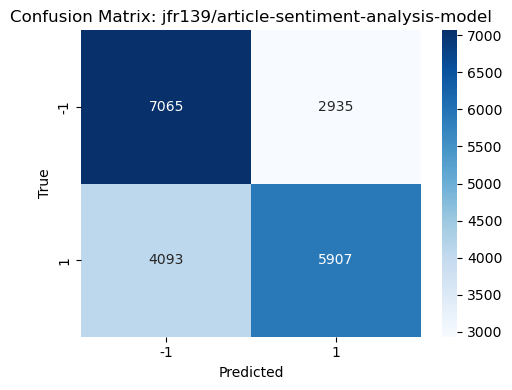


Classification Report for jfr139/article-sentiment-analysis-model:

              precision    recall  f1-score   support

          -1     0.6332    0.7065    0.6678     10000
           1     0.6681    0.5907    0.6270     10000

    accuracy                         0.6486     20000
   macro avg     0.6506    0.6486    0.6474     20000
weighted avg     0.6506    0.6486    0.6474     20000



=== Сводка результатов ===
                                     model  accuracy  macro_f1  f1_-1  f1_0  f1_1
  Mekteck/sentiment-analysis-model-team-28      0.67      0.67   0.68  0.00  0.67
aakinlalu/finetune-bert-sentiment-analysis      0.67      0.65   0.73  0.00  0.57
   jfr139/article-sentiment-analysis-model      0.65      0.65   0.67  0.00  0.63


,model,accuracy,macro_f1,f1_-1,f1_0,f1_1
1,Mekteck/sentiment-analysis-model-team-28,0.67,0.67,0.68,0.00,0.67
0,aakinlalu/finetune-bert-sentiment-analysis,0.67,0.65,0.73,0.00,0.57
2,jfr139/article-sentiment-analysis-model,0.65,0.65,0.67,0.00,0.63


In [66]:
evaluate_models(binary_models, text_raw_bin, labels_bin, variant='raw', max_time_per_model=6000)

Фильтр прошло моделей: 1 из 1


==== Оценка модели: distilbert-base-uncased-finetuned-sst-2-english ====


distilbert-base-uncased-finetuned-sst-2-english: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [04:09<00:00, 80.07it/s]


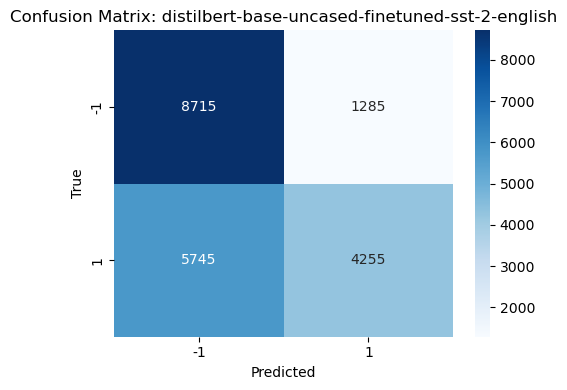


Classification Report for distilbert-base-uncased-finetuned-sst-2-english:

              precision    recall  f1-score   support

          -1     0.6027    0.8715    0.7126     10000
           1     0.7681    0.4255    0.5476     10000

    accuracy                         0.6485     20000
   macro avg     0.6854    0.6485    0.6301     20000
weighted avg     0.6854    0.6485    0.6301     20000



=== Сводка результатов ===
                                          model  accuracy  macro_f1  f1_-1  f1_0  f1_1
distilbert-base-uncased-finetuned-sst-2-english      0.65      0.63   0.71  0.00  0.55


,model,accuracy,macro_f1,f1_-1,f1_0,f1_1
0,distilbert-base-uncased-finetuned-sst-2-english,0.65,0.63,0.71,0.00,0.55


In [77]:
evaluate_models(["distilbert-base-uncased-finetuned-sst-2-english"], text_raw_bin, labels_bin, variant='raw', max_time_per_model=6000)

### Попробуем на трансформерах на 3 классах

Фильтр прошло моделей: 6 из 6


==== Оценка модели: AmanSengar/sentiment-analysis-for-user-reviews-sentiment ====


AmanSengar/sentiment-analysis-for-user-reviews-sentiment: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30000/30000 [11:02<00:00, 45.31it/s]


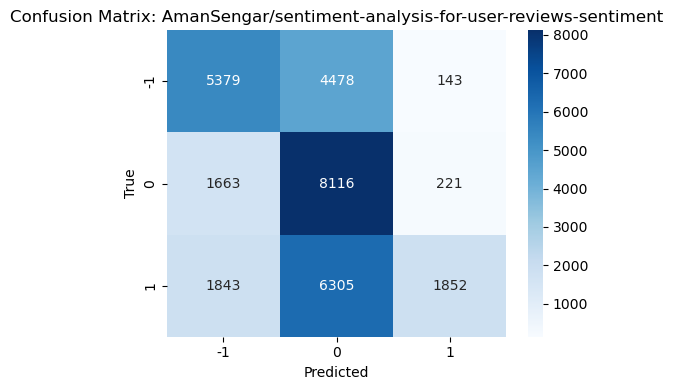


Classification Report for AmanSengar/sentiment-analysis-for-user-reviews-sentiment:

              precision    recall  f1-score   support

          -1     0.6054    0.5379    0.5697     10000
           0     0.4294    0.8116    0.5617     10000
           1     0.8357    0.1852    0.3032     10000

    accuracy                         0.5116     30000
   macro avg     0.6235    0.5116    0.4782     30000
weighted avg     0.6235    0.5116    0.4782     30000



==== Оценка модели: MESSItom/BERT-review-sentiment-analysis ====


MESSItom/BERT-review-sentiment-analysis: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30000/30000 [11:23<00:00, 43.87it/s]


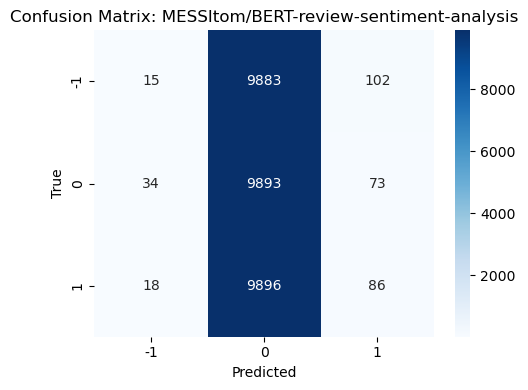


Classification Report for MESSItom/BERT-review-sentiment-analysis:

              precision    recall  f1-score   support

          -1     0.2239    0.0015    0.0030     10000
           0     0.3334    0.9893    0.4987     10000
           1     0.3295    0.0086    0.0168     10000

    accuracy                         0.3331     30000
   macro avg     0.2956    0.3331    0.1728     30000
weighted avg     0.2956    0.3331    0.1728     30000



==== Оценка модели: bareeraqrsh/Sentiment-analysis-tool ====


bareeraqrsh/Sentiment-analysis-tool: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30000/30000 [06:44<00:00, 74.19it/s]


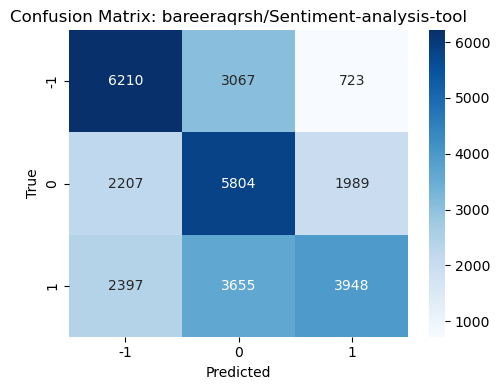


Classification Report for bareeraqrsh/Sentiment-analysis-tool:

              precision    recall  f1-score   support

          -1     0.5743    0.6210    0.5967     10000
           0     0.4634    0.5804    0.5153     10000
           1     0.5928    0.3948    0.4739     10000

    accuracy                         0.5321     30000
   macro avg     0.5435    0.5321    0.5287     30000
weighted avg     0.5435    0.5321    0.5287     30000



==== Оценка модели: tabularisai/multilingual-sentiment-analysis ====


tabularisai/multilingual-sentiment-analysis: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30000/30000 [06:59<00:00, 71.59it/s]


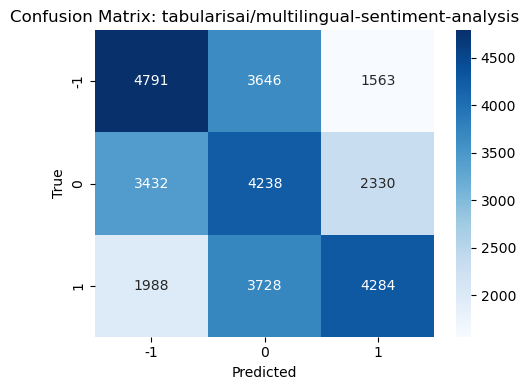


Classification Report for tabularisai/multilingual-sentiment-analysis:

              precision    recall  f1-score   support

          -1     0.4692    0.4791    0.4741     10000
           0     0.3650    0.4238    0.3922     10000
           1     0.5239    0.4284    0.4714     10000

    accuracy                         0.4438     30000
   macro avg     0.4527    0.4438    0.4459     30000
weighted avg     0.4527    0.4438    0.4459     30000



==== Оценка модели: nlptown/bert-base-multilingual-uncased-sentiment ====


nlptown/bert-base-multilingual-uncased-sentiment: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30000/30000 [11:25<00:00, 43.73it/s]


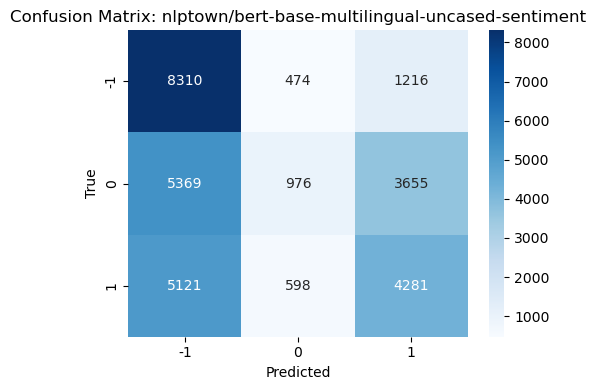


Classification Report for nlptown/bert-base-multilingual-uncased-sentiment:

              precision    recall  f1-score   support

          -1     0.4420    0.8310    0.5771     10000
           0     0.4766    0.0976    0.1620     10000
           1     0.4678    0.4281    0.4471     10000

    accuracy                         0.4522     30000
   macro avg     0.4621    0.4522    0.3954     30000
weighted avg     0.4621    0.4522    0.3954     30000



==== Оценка модели: nhull/distilbert-sentiment-model ====


nhull/distilbert-sentiment-model: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30000/30000 [05:15<00:00, 95.07it/s]


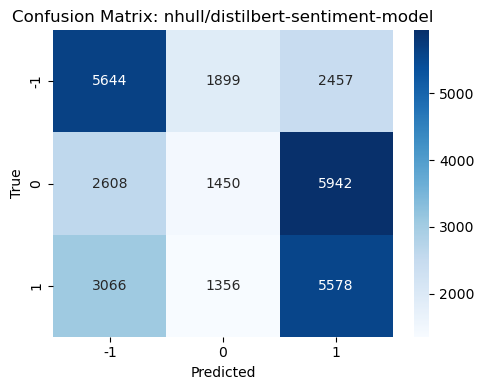


Classification Report for nhull/distilbert-sentiment-model:

              precision    recall  f1-score   support

          -1     0.4987    0.5644    0.5295     10000
           0     0.3082    0.1450    0.1972     10000
           1     0.3991    0.5578    0.4653     10000

    accuracy                         0.4224     30000
   macro avg     0.4020    0.4224    0.3973     30000
weighted avg     0.4020    0.4224    0.3973     30000



=== Сводка результатов ===
                                                   model  accuracy  macro_f1  f1_-1  f1_0  f1_1
                     bareeraqrsh/Sentiment-analysis-tool      0.53      0.53   0.60  0.52  0.47
AmanSengar/sentiment-analysis-for-user-reviews-sentiment      0.51      0.48   0.57  0.56  0.30
             tabularisai/multilingual-sentiment-analysis      0.44      0.45   0.47  0.39  0.47
                        nhull/distilbert-sentiment-model      0.42      0.40   0.53  0.20  0.47
        nlptown/bert-base-multilingual-uncased-s

,model,accuracy,macro_f1,f1_-1,f1_0,f1_1
2,bareeraqrsh/Sentiment-analysis-tool,0.53,0.53,0.60,0.52,0.47
0,AmanSengar/sentiment-analysis-for-user-reviews...,0.51,0.48,0.57,0.56,0.30
3,tabularisai/multilingual-sentiment-analysis,0.44,0.45,0.47,0.39,0.47
5,nhull/distilbert-sentiment-model,0.42,0.40,0.53,0.20,0.47
4,nlptown/bert-base-multilingual-uncased-sentiment,0.45,0.40,0.58,0.16,0.45
1,MESSItom/BERT-review-sentiment-analysis,0.33,0.17,0.00,0.50,0.02


In [70]:
evaluate_models(multiclass_models, text_lemma_multi, labels_multi, variant='lemma', max_time_per_model=6000)

### Выводы: Исследования показали, что более трансформеры из коробки показали весьма слабые точности, но то что все показали приблизительно одни и теже цифры наводит на мысль, что меточная разметка в датасете или плохая или просто получена не семантическим а частотным способом. Вначале попробуем получить новые метки и проверить точность на них а затем переобучить трансформер.

## Пробуем получить новые метки

In [3]:
df_loaded = pd.read_csv("combined_texts_preprocessed.csv")

In [4]:
df_loaded

,text_raw,text_clean,text_lemma,label
0,family mormon have never tried explain them t...,family mormon have never tried explain them th...,family mormon try explain stare puzzle time ti...,1
1,buddhism has very much lot compatible with chr...,buddhism has very much lot compatible with chr...,buddhism lot compatible christianity especiall...,1
2,seriously don say thing first all they won get...,seriously don say thing first all they won get...,seriously don thing win complex explain normal...,-1
3,what you have learned yours and only yours wha...,what you have learned yours and only yours wha...,learn want teach different focus goal wrapping...,0
4,for your own benefit you may want read living ...,for your own benefit you may want read living ...,benefit want read live buddha live christ thic...,1
...,...,...,...,...
200113,why these 456 crores paid neerav modi not reco...,why these crores paid neerav modi not recovere...,crore pay neerav modi recover congress leader ...,-1
200114,dear rss terrorist payal gawar what about modi...,dear rss terrorist payal gawar what about modi...,dear rss terrorist payal gawar modi kill plus ...,-1
200115,did you cover her interaction forum where she ...,did you cover her interaction forum where she ...,cover interaction forum leave,0
200116,there big project came into india modi dream p...,there big project came into india modi dream p...,big project come india modi dream project happ...,0


In [5]:
transformer = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")
new_df = analyze_text_sentiment_batch(df_loaded['text_raw'], transformer)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200118/200118 [1:57:19<00:00, 28.43it/s]


In [6]:
new_df

,text,transformer_label,transformer_score,vader_score,label_mapped
0,family mormon have never tried explain them t...,POSITIVE,0.99,0.93,1
1,buddhism has very much lot compatible with chr...,NEGATIVE,0.98,1.00,-1
2,seriously don say thing first all they won get...,NEGATIVE,0.84,0.88,-1
3,what you have learned yours and only yours wha...,NEGATIVE,0.87,0.08,-1
4,for your own benefit you may want read living ...,POSITIVE,1.00,0.89,1
...,...,...,...,...,...
200113,why these 456 crores paid neerav modi not reco...,NEGATIVE,1.00,-0.13,-1
200114,dear rss terrorist payal gawar what about modi...,NEGATIVE,1.00,-0.96,-1
200115,did you cover her interaction forum where she ...,NEGATIVE,1.00,0.00,-1
200116,there big project came into india modi dream p...,NEGATIVE,0.98,0.13,-1


In [7]:
new_df.to_csv("new_df.csv", index=False)

In [15]:
df_new_balanced_bin = new_balanced_sample_binary(new_df, label_mapped=[-1,1], per_class=10000)

In [16]:
text_raw_bin = df_new_balanced_bin['text'].tolist()
labels_bin = df_new_balanced_bin['label_mapped'].tolist()

In [17]:
text_raw_bin = [str(t) for t in text_raw_bin]

### Применим новые метки на бинарниках

Фильтр прошло моделей: 3 из 4


==== Оценка модели: aakinlalu/finetune-bert-sentiment-analysis ====


aakinlalu/finetune-bert-sentiment-analysis: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [06:39<00:00, 50.05it/s]


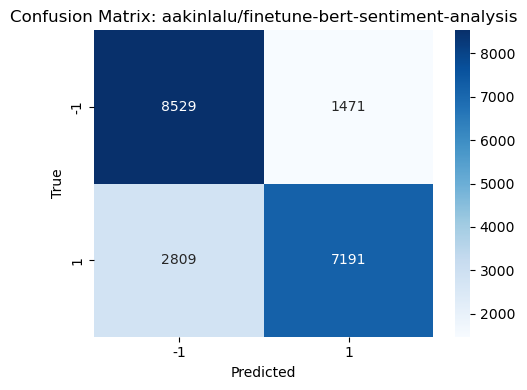


Classification Report for aakinlalu/finetune-bert-sentiment-analysis:

              precision    recall  f1-score   support

          -1     0.7522    0.8529    0.7994     10000
           1     0.8302    0.7191    0.7707     10000

    accuracy                         0.7860     20000
   macro avg     0.7912    0.7860    0.7850     20000
weighted avg     0.7912    0.7860    0.7850     20000



==== Оценка модели: Mekteck/sentiment-analysis-model-team-28 ====


Mekteck/sentiment-analysis-model-team-28: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [03:26<00:00, 96.70it/s]


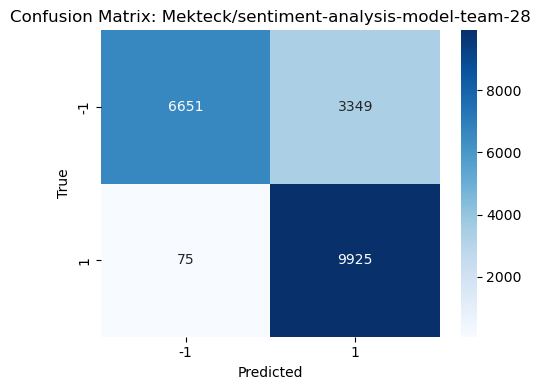


Classification Report for Mekteck/sentiment-analysis-model-team-28:

              precision    recall  f1-score   support

          -1     0.9888    0.6651    0.7953     10000
           1     0.7477    0.9925    0.8529     10000

    accuracy                         0.8288     20000
   macro avg     0.8683    0.8288    0.8241     20000
weighted avg     0.8683    0.8288    0.8241     20000



==== Оценка модели: jfr139/article-sentiment-analysis-model ====


jfr139/article-sentiment-analysis-model: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [03:26<00:00, 96.90it/s]


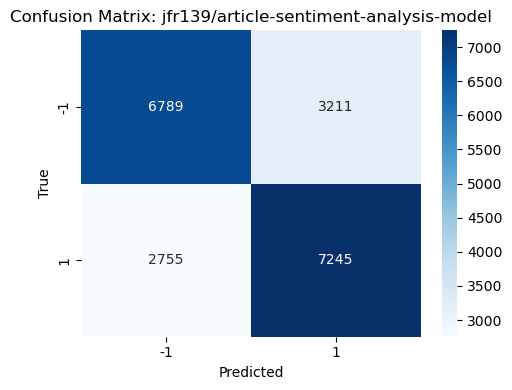


Classification Report for jfr139/article-sentiment-analysis-model:

              precision    recall  f1-score   support

          -1     0.7113    0.6789    0.6947     10000
           1     0.6929    0.7245    0.7083     10000

    accuracy                         0.7017     20000
   macro avg     0.7021    0.7017    0.7015     20000
weighted avg     0.7021    0.7017    0.7015     20000



=== Сводка результатов ===
                                     model  accuracy  macro_f1  f1_-1  f1_0  f1_1
  Mekteck/sentiment-analysis-model-team-28      0.83      0.82   0.80  0.00  0.85
aakinlalu/finetune-bert-sentiment-analysis      0.79      0.79   0.80  0.00  0.77
   jfr139/article-sentiment-analysis-model      0.70      0.70   0.69  0.00  0.71


,model,accuracy,macro_f1,f1_-1,f1_0,f1_1
1,Mekteck/sentiment-analysis-model-team-28,0.83,0.82,0.80,0.00,0.85
0,aakinlalu/finetune-bert-sentiment-analysis,0.79,0.79,0.80,0.00,0.77
2,jfr139/article-sentiment-analysis-model,0.70,0.70,0.69,0.00,0.71


In [19]:
evaluate_models(binary_models, text_raw_bin, labels_bin, variant='raw', max_time_per_model=6000)

### Получим метки и разбивку для 3 классовой классификации

In [26]:
transformer = pipeline(
    "sentiment-analysis",
    model="cardiffnlp/twitter-roberta-base-sentiment",
    device=0,  # 👈 Обязательно!
    framework="pt"
)
df_results = analyze_text_sentiment_batch_v2_fast(df_loaded['text_raw'], transformer, model_type="3class")

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3127/3127 [30:55<00:00,  1.68it/s]


In [27]:
df_results.to_csv("df_results.csv", index=False)

In [34]:
df_results

,text,transformer_label,transformer_score,vader_score,vader_label,label_mapped,disagree
0,family mormon have never tried explain them t...,LABEL_1,0.66,0.93,1,0,True
1,buddhism has very much lot compatible with chr...,LABEL_1,0.68,1.00,1,0,True
2,seriously don say thing first all they won get...,LABEL_0,0.61,0.88,1,-1,True
3,what you have learned yours and only yours wha...,LABEL_1,0.83,0.08,1,0,True
4,for your own benefit you may want read living ...,LABEL_1,0.63,0.89,1,0,True
...,...,...,...,...,...,...,...
200113,why these 456 crores paid neerav modi not reco...,LABEL_0,0.62,-0.13,-1,-1,False
200114,dear rss terrorist payal gawar what about modi...,LABEL_0,0.94,-0.96,-1,-1,False
200115,did you cover her interaction forum where she ...,LABEL_1,0.81,0.00,0,0,False
200116,there big project came into india modi dream p...,LABEL_1,0.57,0.13,1,0,True


In [35]:
df_results.describe()

,transformer_score,vader_score,vader_label,label_mapped
count,"200,118.00","200,118.00","200,118.00","200,118.00"
mean,0.70,0.09,0.15,-0.24
std,0.13,0.49,0.86,0.64
min,0.35,-1.00,-1.00,-1.00
25%,0.59,-0.25,-1.00,-1.00
50%,0.70,0.00,0.00,0.00
75%,0.81,0.48,1.00,0.00
max,0.99,1.00,1.00,1.00


In [37]:
total = len(df_results)
agree = (df_results["disagree"] == False).sum()
print(f"Совпали метки VADER и Transformer в {agree} из {total} примеров ({agree / total:.2%})")

Совпали метки VADER и Transformer в 101876 из 200118 примеров (50.91%)


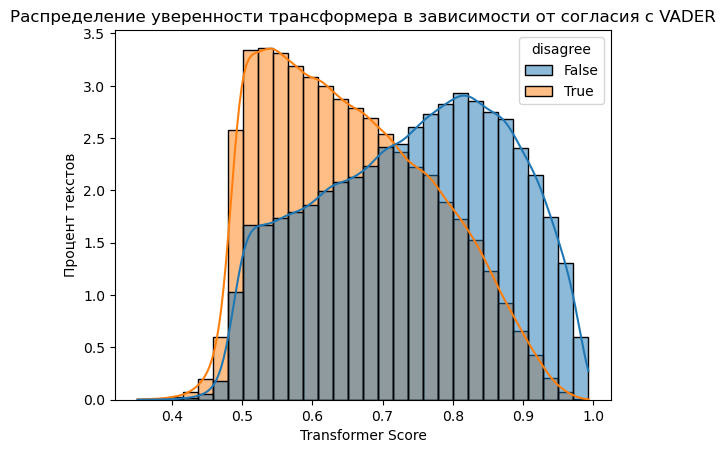

In [39]:
sns.histplot(data=df_results, x="transformer_score", hue="disagree", bins=30, kde=True, stat="percent")
plt.title("Распределение уверенности трансформера в зависимости от согласия с VADER")
plt.xlabel("Transformer Score")
plt.ylabel("Процент текстов")
plt.show()

In [30]:
df_balanced_multi = new_balanced_sample_multiclass(df_results, label_mapped=[-1,0,1], per_class=10000)

In [31]:
text_raw_multi = df_balanced_multi['text'].tolist()
labels_multi = df_balanced_multi['label_mapped'].tolist()

In [32]:
text_raw_multi = [str(t) for t in text_raw_multi]

Фильтр прошло моделей: 6 из 6


==== Оценка модели: AmanSengar/sentiment-analysis-for-user-reviews-sentiment ====
Ошибка при обработке модели AmanSengar/sentiment-analysis-for-user-reviews-sentiment: data did not match any variant of untagged enum ModelWrapper at line 250356 column 3


==== Оценка модели: MESSItom/BERT-review-sentiment-analysis ====


MESSItom/BERT-review-sentiment-analysis: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30000/30000 [09:46<00:00, 51.17it/s]


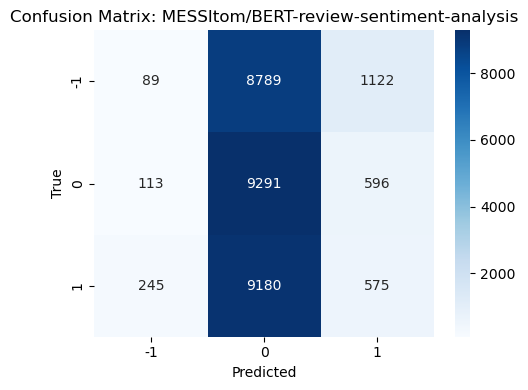


Classification Report for MESSItom/BERT-review-sentiment-analysis:

              precision    recall  f1-score   support

          -1     0.1991    0.0089    0.0170     10000
           0     0.3408    0.9291    0.4987     10000
           1     0.2508    0.0575    0.0935     10000

    accuracy                         0.3318     30000
   macro avg     0.2636    0.3318    0.2031     30000
weighted avg     0.2636    0.3318    0.2031     30000



==== Оценка модели: bareeraqrsh/Sentiment-analysis-tool ====


bareeraqrsh/Sentiment-analysis-tool: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30000/30000 [05:18<00:00, 94.32it/s]


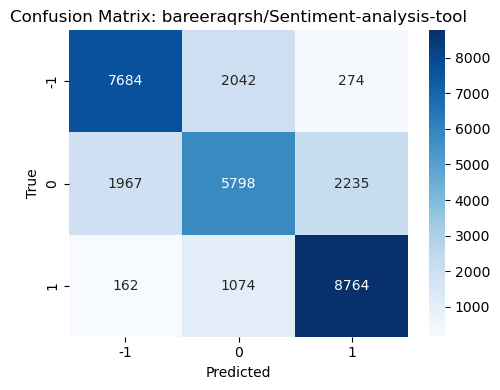


Classification Report for bareeraqrsh/Sentiment-analysis-tool:

              precision    recall  f1-score   support

          -1     0.7830    0.7684    0.7757     10000
           0     0.6504    0.5798    0.6131     10000
           1     0.7774    0.8764    0.8240     10000

    accuracy                         0.7415     30000
   macro avg     0.7370    0.7415    0.7376     30000
weighted avg     0.7370    0.7415    0.7376     30000



==== Оценка модели: tabularisai/multilingual-sentiment-analysis ====


tabularisai/multilingual-sentiment-analysis: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30000/30000 [05:15<00:00, 95.00it/s]


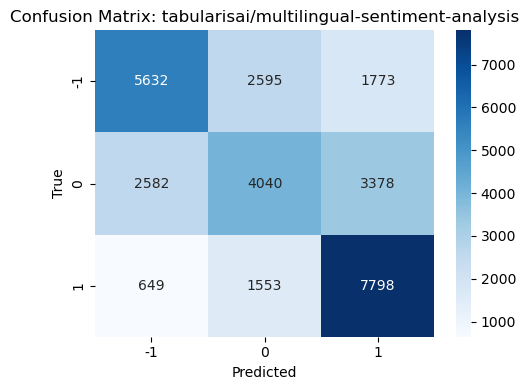


Classification Report for tabularisai/multilingual-sentiment-analysis:

              precision    recall  f1-score   support

          -1     0.6355    0.5632    0.5971     10000
           0     0.4934    0.4040    0.4442     10000
           1     0.6022    0.7798    0.6796     10000

    accuracy                         0.5823     30000
   macro avg     0.5770    0.5823    0.5737     30000
weighted avg     0.5770    0.5823    0.5737     30000



==== Оценка модели: nlptown/bert-base-multilingual-uncased-sentiment ====


nlptown/bert-base-multilingual-uncased-sentiment: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30000/30000 [11:33<00:00, 43.29it/s]


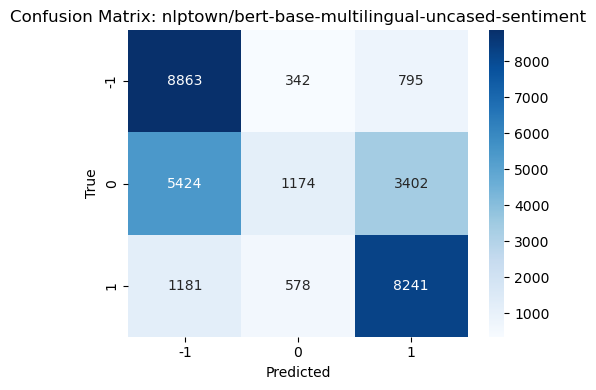


Classification Report for nlptown/bert-base-multilingual-uncased-sentiment:

              precision    recall  f1-score   support

          -1     0.5730    0.8863    0.6960     10000
           0     0.5606    0.1174    0.1941     10000
           1     0.6626    0.8241    0.7346     10000

    accuracy                         0.6093     30000
   macro avg     0.5987    0.6093    0.5416     30000
weighted avg     0.5987    0.6093    0.5416     30000



==== Оценка модели: nhull/distilbert-sentiment-model ====


nhull/distilbert-sentiment-model: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30000/30000 [07:25<00:00, 67.35it/s]


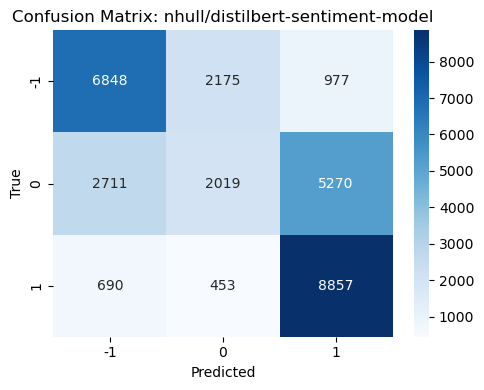


Classification Report for nhull/distilbert-sentiment-model:

              precision    recall  f1-score   support

          -1     0.6682    0.6848    0.6764     10000
           0     0.4345    0.2019    0.2757     10000
           1     0.5864    0.8857    0.7056     10000

    accuracy                         0.5908     30000
   macro avg     0.5630    0.5908    0.5526     30000
weighted avg     0.5630    0.5908    0.5526     30000



=== Сводка результатов ===
                                           model  accuracy  macro_f1  f1_-1  f1_0  f1_1
             bareeraqrsh/Sentiment-analysis-tool      0.74      0.74   0.78  0.61  0.82
     tabularisai/multilingual-sentiment-analysis      0.58      0.57   0.60  0.44  0.68
                nhull/distilbert-sentiment-model      0.59      0.55   0.68  0.28  0.71
nlptown/bert-base-multilingual-uncased-sentiment      0.61      0.54   0.70  0.19  0.73
         MESSItom/BERT-review-sentiment-analysis      0.33      0.20   0.02  0.50  0.09


,model,accuracy,macro_f1,f1_-1,f1_0,f1_1
1,bareeraqrsh/Sentiment-analysis-tool,0.74,0.74,0.78,0.61,0.82
2,tabularisai/multilingual-sentiment-analysis,0.58,0.57,0.60,0.44,0.68
4,nhull/distilbert-sentiment-model,0.59,0.55,0.68,0.28,0.71
3,nlptown/bert-base-multilingual-uncased-sentiment,0.61,0.54,0.70,0.19,0.73
0,MESSItom/BERT-review-sentiment-analysis,0.33,0.20,0.02,0.50,0.09


In [33]:
evaluate_models(multiclass_models, text_raw_multi, labels_multi, variant='raw', max_time_per_model=6000)

#### Выводы: Старые метки, вероятно, были сделаны несемантически, возможно с помощью частотных моделей (TF-IDF или вручную, без учета смысла). Это объясняет низкую точность трансформеров на «оригинальной» разметке.
- Трансформеры "из коробки" могут демонстрировать высокую точность на "новых" метках, которые были получены тоже с помощью трансформера — то есть эти метки ближе к семантическому смыслу текста.
- Косвенно подтверждено: вероятно, изначальная разметка была "простая", возможно даже поверхностная — и не учитывала смысл, который извлекает трансформер.



## Пробуем transfer learning (без заморозки слоёв)

In [3]:
df_loaded = pd.read_csv("combined_texts_preprocessed.csv")

In [4]:
df_loaded

,text_raw,text_clean,text_lemma,label
0,family mormon have never tried explain them t...,family mormon have never tried explain them th...,family mormon try explain stare puzzle time ti...,1
1,buddhism has very much lot compatible with chr...,buddhism has very much lot compatible with chr...,buddhism lot compatible christianity especiall...,1
2,seriously don say thing first all they won get...,seriously don say thing first all they won get...,seriously don thing win complex explain normal...,-1
3,what you have learned yours and only yours wha...,what you have learned yours and only yours wha...,learn want teach different focus goal wrapping...,0
4,for your own benefit you may want read living ...,for your own benefit you may want read living ...,benefit want read live buddha live christ thic...,1
...,...,...,...,...
200113,why these 456 crores paid neerav modi not reco...,why these crores paid neerav modi not recovere...,crore pay neerav modi recover congress leader ...,-1
200114,dear rss terrorist payal gawar what about modi...,dear rss terrorist payal gawar what about modi...,dear rss terrorist payal gawar modi kill plus ...,-1
200115,did you cover her interaction forum where she ...,did you cover her interaction forum where she ...,cover interaction forum leave,0
200116,there big project came into india modi dream p...,there big project came into india modi dream p...,big project come india modi dream project happ...,0


In [5]:
# === 1. Загрузка и маппинг меток ===
label_map = {-1: 0, 0: 1, 1: 2}
inv_label_map = {v: k for k, v in label_map.items()}

df = df_loaded.copy()
df["label_mapped"] = df["label"].map(label_map)

# === 2. Разделение на train/val/test ===
df_train, df_temp = train_test_split(df, test_size=0.3, stratify=df["label_mapped"], random_state=42)
df_val, df_test = train_test_split(df_temp, test_size=0.5, stratify=df_temp["label_mapped"], random_state=42)


In [6]:
ds = DatasetDict({
    "train": make_hf_dataset(df_train),
    "val": make_hf_dataset(df_val),
    "test": make_hf_dataset(df_test),
})

In [7]:
# --- Подготовка устройства
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# --- Настройка модели
model_name = "bareeraqrsh/Sentiment-analysis-tool"  # или AmanSengar/...
num_labels = 3  # 2 для бинарной или 3 для многоклассовой
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3)

In [8]:
def tokenize_fn(example):
    return tokenizer(example["text_raw"], truncation=True, padding="max_length", max_length=256)

In [9]:
ds = ds.map(tokenize_fn, batched=True)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

Map: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30018/30018 [00:03<00:00, 9348.86 examples/s]


In [10]:
# === 6. Метрики ===
def compute_metrics(eval_preds):
    logits, labels = eval_preds
    preds = np.argmax(logits, axis=-1)
    report = classification_report(labels, preds, output_dict=True, zero_division=0)
    return {
        "accuracy": report["accuracy"],
        "macro_f1": report["macro avg"]["f1-score"],
    }


In [16]:
# === 7. Аргументы обучения ===
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    logging_strategy="epoch",
    per_device_train_batch_size=16,
    gradient_accumulation_steps=4,
    per_device_eval_batch_size=32,
    num_train_epochs=3,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model="macro_f1",
    logging_dir="./logs",
)

In [17]:
# === 8. Тренер ===
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=ds["train"],
    eval_dataset=ds["val"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

In [18]:
# === 9. Обучение ===
trainer.train()


Epoch,Training Loss,Validation Loss,Accuracy,Macro F1
1,0.134200,0.084836,0.975281,0.972525
2,0.056700,0.065391,0.980845,0.978864
3,0.028200,0.069153,0.983277,0.981482


TrainOutput(global_step=6567, training_loss=0.07303925571293524, metrics={'train_runtime': 11304.1643, 'train_samples_per_second': 37.176, 'train_steps_per_second': 0.581, 'total_flos': 2.783494359564595e+16, 'train_loss': 0.07303925571293524, 'epoch': 3.0})

In [19]:
# === 10. Предсказания на тесте ===
preds = trainer.predict(ds["test"])
y_pred = np.argmax(preds.predictions, axis=-1)
y_true = preds.label_ids

# === 11. Обратное преобразование меток ===
y_pred_orig = [inv_label_map[i] for i in y_pred]
y_true_orig = [inv_label_map[i] for i in y_true]

# === 12. Вывод отчета ===
print("\n=== Classification Report (original labels) ===")
print(classification_report(y_true_orig, y_pred_orig, digits=4))



=== Classification Report (original labels) ===
              precision    recall  f1-score   support

          -1     0.9679    0.9741    0.9710      6568
           0     0.9918    0.9875    0.9896     10238
           1     0.9850    0.9852    0.9851     13212

    accuracy                         0.9835     30018
   macro avg     0.9816    0.9823    0.9819     30018
weighted avg     0.9836    0.9835    0.9836     30018



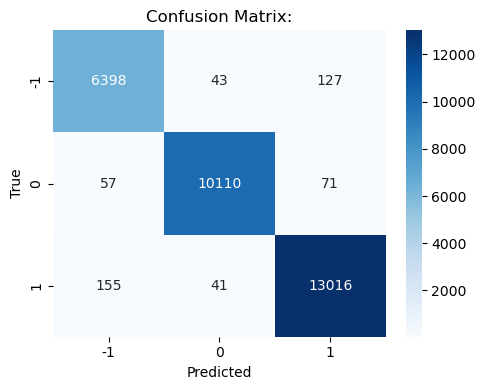

In [24]:
labels_for_conf = [-1, 0, 1] 
conf = confusion_matrix(y_true_orig, y_pred_orig, labels=labels_for_conf)

plt.figure(figsize=(5, 4))
sns.heatmap(conf, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels_for_conf, yticklabels=labels_for_conf)
plt.title(f"Confusion Matrix:")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

#### Выводы: Трансформер спокойно может обучиться на частотных метках и получить отличную точность.